# Analysis of weather in Berlin, Germany for 144 years (1876 until 2019).

This dataset accompany my learning process almost from the beginning. So I tried here a lot, I was many times angry but also many times very happy. 

I wrote the code first in Pycharm and I wanted make it fancy using functions for each small analysis. Here in Jupyter its a nonsence but well, I was learning.

In [1]:
import pandas as pd
from pandas import read_csv
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib.pylab as plt
from matplotlib import dates
from datetime import datetime
import numpy as np
import sklearn.linear_model
from scipy.ndimage.filters import gaussian_filter
import seaborn as sns; sns.set()
from mpl_toolkits.mplot3d import Axes3D
# import calmap
from openpyxl import Workbook
pd.options.display.width = 0
pd.options.display.max_rows = None

## Firstly, we have separated CSV files for different periods of time. 

I will merge all that files to one CSV file:
1. berlin_klima_1948_2019.txt
2. berlin_max_temp_daily_1876_1962.csv
3. berlin_min_temp_daily_1876_1962.csv
4. berlin_mean_temp_daily_1876_1962.csv

In [ ]:
def read_file():
	# Reading the weather data txt. Making a copy of df data
	data = read_csv('berlin_klima_1948_2019.txt', header=0, parse_dates=[1], sep=';')
	data_copy = data.copy()
	print("--- Data copy: DONE ---")
	print("+++ Check data with def check_data() if needed +++")
	return data_copy

def read_file_max_1876():
	data2 = read_csv('berlin_max_temp_daily_1876_1962.csv',
					 usecols=["Zeitstempel", "Wert"],
					 header=0, parse_dates=["Zeitstempel"], sep=',').rename(
		columns={
			"Zeitstempel": "Measurement day",
			"Wert": "Max daily temp"
		}
	)
	data_copy2 = data2.copy()
	# print(data_copy2.info())
	# print(data_copy2.head())
	data_copy2 = data_copy2.set_index('Measurement day')
	until_1948_max = data_copy2['1876-01-01': '1947-12-31']
	until_1948_max.reset_index(inplace=True)
	# print(until_1948.head())
	# print(until_1948.tail())
	return until_1948_max

def read_file_min_1876():
	data3 = read_csv('berlin_min_temp_daily_1876_1962.csv',
					 usecols=["Zeitstempel", "Wert"],
					 header=0, parse_dates=["Zeitstempel"], sep=',').rename(
		columns={
			"Zeitstempel": "Measurement day",
			"Wert": "Min daily temp"
		}
	)
	data_copy3 = data3.copy()
	# print(data_copy3.info())
	# print(data_copy3.head())
	data_copy3 = data_copy3.set_index('Measurement day')
	until_1948_min = data_copy3['1876-01-01': '1947-12-31']
	until_1948_min.reset_index(inplace=True)
	# print(until_1948_min.head())
	# print(until_1948_min.tail())
	return until_1948_min

def read_file_mean_1876():
	data4 = read_csv('berlin_mean_temp_daily_1876_1962.csv',
					 usecols=["Zeitstempel", "Wert"],
					 header=0, parse_dates=["Zeitstempel"], sep=',').rename(
		columns={
			"Zeitstempel": "Measurement day",
			"Wert": "Medium daily temp"
		}
	)
	data_copy4 = data4.copy()
	# print(data_copy4.info())
	# print(data_copy4.head())
	data_copy4 = data_copy4.set_index('Measurement day')
	until_1948_mean = data_copy4['1876-01-01': '1947-12-31']
	until_1948_mean.reset_index(inplace=True)
	# print(until_1948_mean.head())
	# print(until_1948_mean.tail())
	return until_1948_mean

In [ ]:
def check_data():
	# Checking the data types etc.
	data_copy = read_file()
	print(data_copy.info())
	print(data_copy.dtypes)
	print(type(data_copy['MESS_DATUM']))
	print(data_copy.head())
	print(data_copy.tail())
	print(data_copy.columns)
	print("--- Checking data: DONE ---")

In [ ]:
def select_data():
	# Selecting data which I like to work with.
	data_copy = read_file()
	selected_cols = ['MESS_DATUM', ' TXK', ' TNK', ' TMK']
	data_copy = data_copy[selected_cols]
	print("--- Selecting columns: DONE ---")
	# Renaming some columns
	data_copy = data_copy.rename(columns={
								'MESS_DATUM': 'Measurement day',
								' TXK': 'Max daily temp',
								' TNK': 'Min daily temp',
								' TMK': 'Medium daily temp'})
	print("--- Renaming columns: DONE ---")
	data_copy = data_copy.set_index('Measurement day')
	data_copy.reset_index(inplace=True)
	# print(data_copy.columns)
	# print(data_copy.head())
	# print(type(data_copy))
	return data_copy

In [ ]:
def combining_datasets():
	data_copy = select_data()
	until_1948_max = read_file_max_1876()
	until_1948_min = read_file_min_1876()
	until_1948_mean = read_file_mean_1876()
	until_1948_max_min = pd.merge(until_1948_max, until_1948_min, on="Measurement day")
	until_1948 = pd.merge(until_1948_max_min, until_1948_mean, on="Measurement day")
	# print(until_1948.head())
	frames = [until_1948, data_copy]
	data_copy_combined = pd.concat(frames, sort=False)
	print("The info of combined data is:\n", (data_copy_combined.info()))
	# print(data_copy_combined.head())
	# print(data_copy_combined.tail())
	return data_copy_combined


def create_combined_csv():
	data_for_csv = combining_datasets()
	data_for_csv.to_csv("ber_weather_combined_1876_2019.csv", index=False)
	print("--- Combined data copied to CSV ---")

## Let's read the combined data for 144 years!

In [2]:
def read_csv_combined():
    data_combined = read_csv('ber_weather_combined_1876_2019.csv', header=0, parse_dates=[0])
    print("--- Combined data read ---\n")
    data_combined['year'] = pd.DatetimeIndex(data_combined['Measurement day']).year
    data_combined = data_combined.set_index('year')
    drop_missing_year = 1945
    data_combined_without_missing_year = data_combined.drop(drop_missing_year, axis=0).reset_index()
    return data_combined_without_missing_year

## First fun! What was the max daily temperature for today in last years?

In [3]:
tdata = read_csv_combined()
tdata['year'] = pd.DatetimeIndex(tdata['Measurement day']).year
tdata['month'] = pd.DatetimeIndex(tdata['Measurement day']).month
tdata['day'] = pd.DatetimeIndex(tdata['Measurement day']).day

x_day = 1
x_month = 5
x_year = 2010
check_today_before = tdata[(tdata['day'] == x_day) &
						   (tdata['year'] >= x_year) &
						   (tdata['month'] == x_month) #&
						   # (tdata['Max daily temp'] >= 13)
]

print(check_today_before.head())
print(f"\nToday temperature {x_day}.{x_month}.2020 in years before was:\n", check_today_before)

check_mean = check_today_before.groupby('year')['Max daily temp'].mean()
print(f"The mean temperatures for month {x_month} from all years are:\n", check_mean)

--- Combined data read ---

       year Measurement day  Max daily temp  Min daily temp  \
48698  2010      2010-05-01            17.2             9.7   
49063  2011      2011-05-01            14.7             4.8   
49429  2012      2012-05-01            27.6             8.8   
49794  2013      2013-05-01            16.3             6.8   
50159  2014      2014-05-01            20.5             7.2   

       Medium daily temp  month  day  
48698               13.7      5    1  
49063                9.4      5    1  
49429               18.0      5    1  
49794               12.0      5    1  
50159               14.7      5    1  

Today temperature 1.5.2020 in years before was:
        year Measurement day  Max daily temp  Min daily temp  \
48698  2010      2010-05-01            17.2             9.7   
49063  2011      2011-05-01            14.7             4.8   
49429  2012      2012-05-01            27.6             8.8   
49794  2013      2013-05-01            16.3             6

We can see it on a plot:

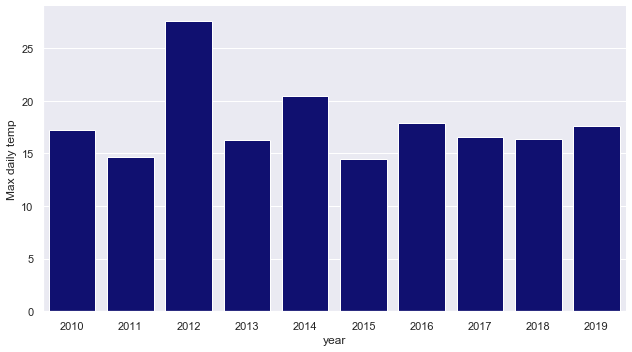

In [4]:
sns.catplot(
	x='year',
	y='Max daily temp',
	data=check_today_before,
	ci=None,
	kind='bar',
	color='navy',
	aspect=16/9
)

In [5]:
#Plot of temperatures for a period of time, like month
#sns.relplot(x='day',
#			y='Max daily temp',
#			hue='year',
#			kind='line',
#			data=check_today_before,
#			legend='full',
#			palette="seismic",
#			ci=None,
#			)
#plt.title(f"Berlin: today temperature {x_day}.{x_month}.2020 in the years before", size=14)
#plt.xlabel("Year", size=11)
#plt.ylabel("Max daily temp C°", size=11)
#plt.xticks(rotation=90, size=8)
#plt.yticks(size=8, ticks=(np.arange(0, 30, 1)))
#plt.show()

## Do we have in Berlin more hot days each year?
Let's check if we can see it on our data using the max daily temperatures. We will print it out and plot days with temperatures over 30°C. Let's check as well if there were less days with temperatures until -10°C.

So from the plots we can clearly see that in 144 years the number of hot days over 30°C is increasing, especially beginning in 80s it seems that these days are much more. We can see also that there are more and more days with extreme temperatures like over 36°C. On the other side is clearly to see that there is a trend for less and less days with temperatures until -10°C.

In [6]:
data_copy_combined = read_csv_combined()
temp_max_sort = data_copy_combined.sort_values(by='Max daily temp', ascending=False)
print("\n--- Highest temperatures sorted from the highest ---")
print(temp_max_sort[:50])

--- Combined data read ---


--- Highest temperatures sorted from the highest ---
       year Measurement day  Max daily temp  Min daily temp  Medium daily temp
52045  2019      2019-06-30            38.5            16.4               28.8
30141  1959      1959-07-11            38.1            19.7               29.6
50622  2015      2015-08-07            38.0            19.4               28.6
51719  2018      2018-08-08            38.0            22.4               28.9
50588  2015      2015-07-04            37.8            21.5               30.1
48769  2010      2010-07-11            37.7            23.4               30.2
52041  2019      2019-06-26            37.5            20.0               29.2
48770  2010      2010-07-12            37.2            21.7               30.5
42946  1994      1994-08-01            37.2            21.9               30.4
42224  1992      1992-08-09            37.1            19.0               29.8
47678  2007      2007-07-16            37.1      

Text(29.158258544921893, 0.5, 'Max daily temperature')

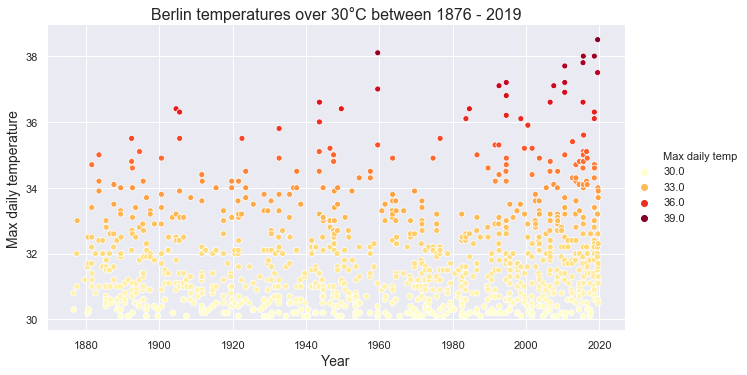

In [7]:
# Plot days with temps over 30°C.
temp_more30 = data_copy_combined.loc[data_copy_combined['Max daily temp'] > 30]
sns.relplot(x="Measurement day",
			y="Max daily temp",
			hue="Max daily temp",
			palette="YlOrRd",
			data=temp_more30,
			aspect=16/9
			)

plt.title("Berlin temperatures over 30°C between 1876 - 2019", size=16)
plt.xlabel("Year", size=14)
plt.ylabel("Max daily temperature", size=14)


Text(30.043419677734384, 0.5, 'Max daily temperature')

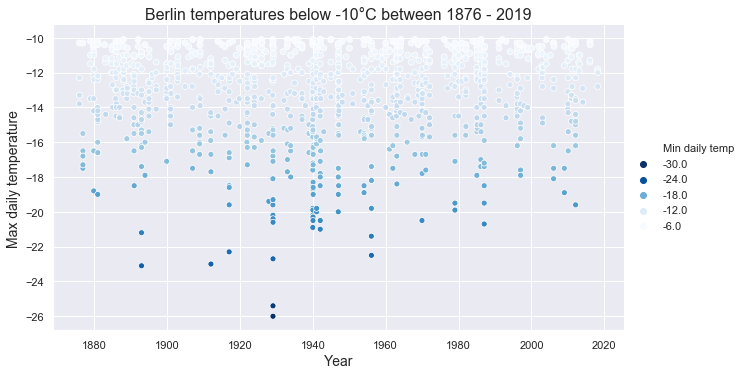

In [8]:
# Plot days with temps less 10°C.
temp_lessminus10 = data_copy_combined.loc[data_copy_combined['Min daily temp'] < -10]
sns.relplot(x="Measurement day",
			y="Min daily temp",
			hue="Min daily temp",
			palette="Blues_r",
			data=temp_lessminus10,
			aspect=16/9
			)
plt.title("Berlin temperatures below -10°C between 1876 - 2019", size=16)
plt.xlabel("Year", size=14)
plt.ylabel("Max daily temperature", size=14)

## So let's have a look how many days exactly are warm.

ok! Let's say I love it over 25°C and for my subjective feeling the niecest year was 2018. 

And we can see that my summer-feeling about the year 2018 was right! 87 days with over 25°C!!! Amazing year :)

In [9]:
data_copy_combined = read_csv_combined()
# Days with temperatures over a value.
data_copy_combined['year'] = pd.DatetimeIndex(data_copy_combined['Measurement day']).year
temp = 25
over_temp = data_copy_combined[(data_copy_combined['Max daily temp'] > temp)].groupby(['year'])['Measurement day'].count().reset_index()
print(f"\nDays per year with temperatures over {temp}:\n", over_temp)

--- Combined data read ---


Days per year with temperatures over 25:
      year  Measurement day
0    1876               33
1    1877               32
2    1878               22
3    1879               19
4    1880               43
5    1881               33
6    1882               28
7    1883               38
8    1884               35
9    1885               35
10   1886               45
11   1887               25
12   1888               24
13   1889               50
14   1890               26
15   1891               19
16   1892               44
17   1893               37
18   1894               24
19   1895               41
20   1896               34
21   1897               33
22   1898               29
23   1899               33
24   1900               37
25   1901               47
26   1902               24
27   1903               30
28   1904               37
29   1905               39
30   1906               42
31   1907               21
32   1908               33
33   1909  

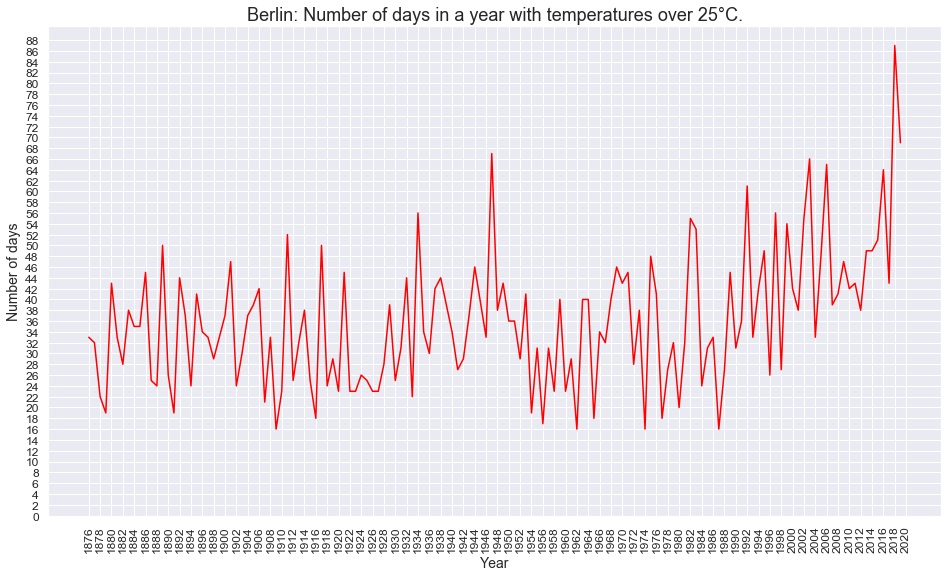

In [18]:
# Let's show it on a graph
sns.lineplot(
	x='year',
	y='Measurement day',
	data=over_temp,
	color='red'
)
plt.title("Berlin: Number of days in a year with temperatures over 25°C.", size=18)
plt.xlabel("Year", size=14)
plt.ylabel("Number of days", size=14)
plt.xticks(rotation=90, size=12, ticks=(np.arange(1876, 2021, 2)))
plt.yticks(size=12, ticks=(np.arange(0, 89, 2)))
plt.show()

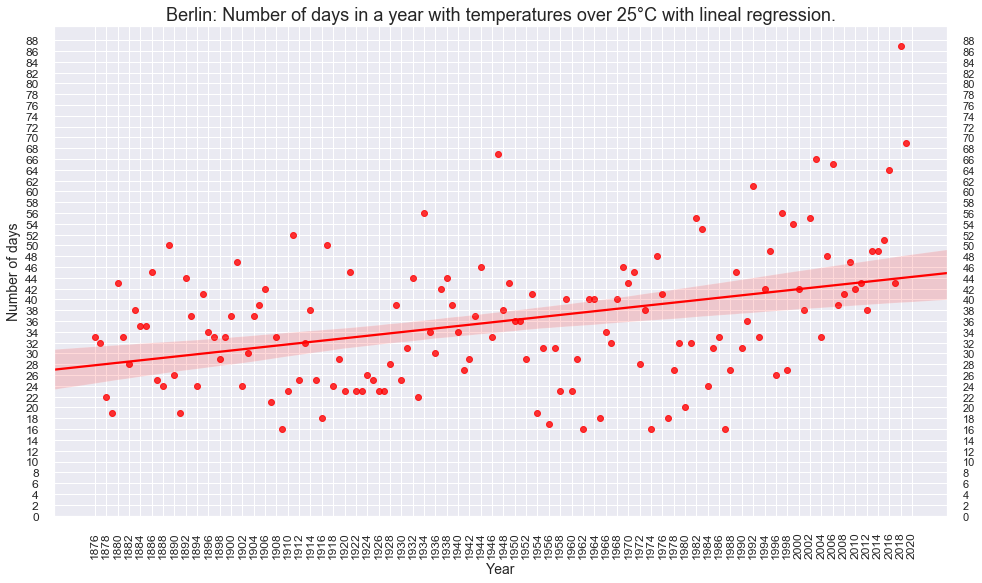

In [19]:
sns.regplot(
	x='year',
	y='Measurement day',
	data=over_temp,
	color='red'
)
plt.rcParams["figure.figsize"] = [16,9]
plt.title("Berlin: Number of days in a year with temperatures over 25°C with lineal regression.", size=18)
plt.xlabel("Year", size=14)
plt.ylabel("Number of days", size=14)
plt.xticks(rotation=90, size=12, ticks=(np.arange(1876, 2021, 2)))
plt.yticks(size=12, ticks=(np.arange(0, 89, 2)))
plt.tick_params(labelright=True, size=12)
plt.show()

## Let's see if we can observe that increase of temperatures in other way.

What if we aggregate the data in decades. Could we see there some trend?

Yes, amazing, we see in decades that max daily temperatures are increqasing in each decade; we can see it clarly in the column Medium daily temperature as well.

In [12]:
data_copy_combined = read_csv_combined()
data_copy_combined = data_copy_combined.groupby(pd.cut(data_copy_combined['Measurement day'], pd.date_range('1876', '2019', freq='10YS'), right=False)).mean()
data_copy_combined.reset_index(inplace=True)
print("\n--- Grouping data in decades ---")
print(data_copy_combined)

--- Combined data read ---


--- Grouping data in decades ---
             Measurement day         year  Max daily temp  Min daily temp  \
0   [1876-01-01, 1886-01-01)  1880.499589       13.038598        5.513030   
1   [1886-01-01, 1896-01-01)  1890.499726       12.560296        5.197727   
2   [1896-01-01, 1906-01-01)  1900.499726       12.868976        5.885296   
3   [1906-01-01, 1916-01-01)  1910.499726       12.950465        5.074836   
4   [1916-01-01, 1926-01-01)  1920.499589       12.845004        4.585820   
5   [1926-01-01, 1936-01-01)  1930.499726       13.030093        4.870044   
6   [1936-01-01, 1946-01-01)  1940.000000       12.825760        4.768917   
7   [1946-01-01, 1956-01-01)  1950.499726       13.312349        5.906654   
8   [1956-01-01, 1966-01-01)  1960.499589       12.775746        5.343827   
9   [1966-01-01, 1976-01-01)  1970.499726       13.225411        5.719524   
10  [1976-01-01, 1986-01-01)  1980.499589       12.922228        5.612209   
11  [1986-01-0

## Can we see all years' temperatures on one plot?

--- Combined data read ---



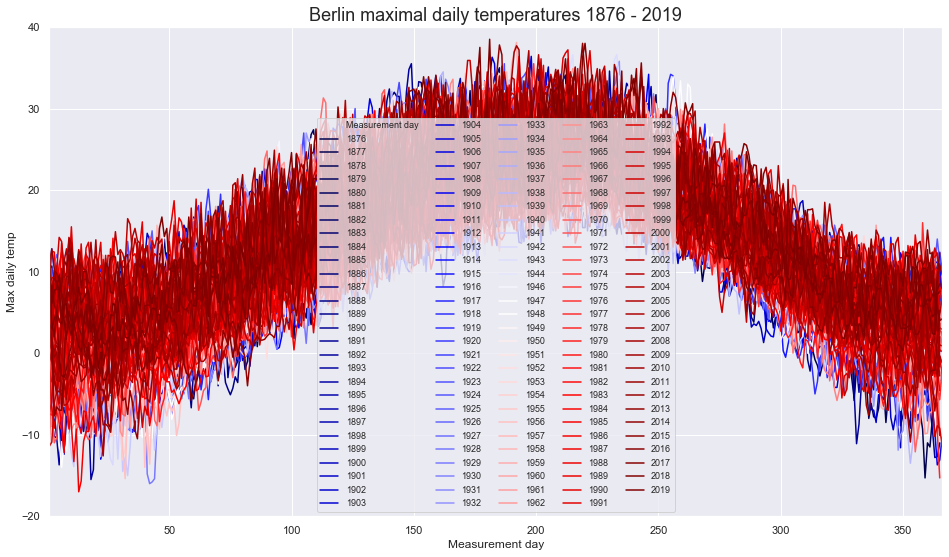

In [13]:
data_copy_combined = read_csv_combined()
sns.lineplot(x=data_copy_combined['Measurement day'].dt.dayofyear,
					y=data_copy_combined['Max daily temp'],
					hue=data_copy_combined['Measurement day'].dt.year,
					legend='full',
					palette="seismic",
					ci=None,
				);
plt.title("Berlin maximal daily temperatures 1876 - 2019", size=18)
plt.legend(ncol=5, loc='lower center', fontsize=9)
plt.xlim(1, 366)
plt.ylim(-20, 40)
plt.show()

That was not so nice indeed!!!

Let's do it in 3d.

Its kind of better, for sure more fancy but still for me personally I can not really see clearly a trend of incresing temperatures.

--- Combined data read ---



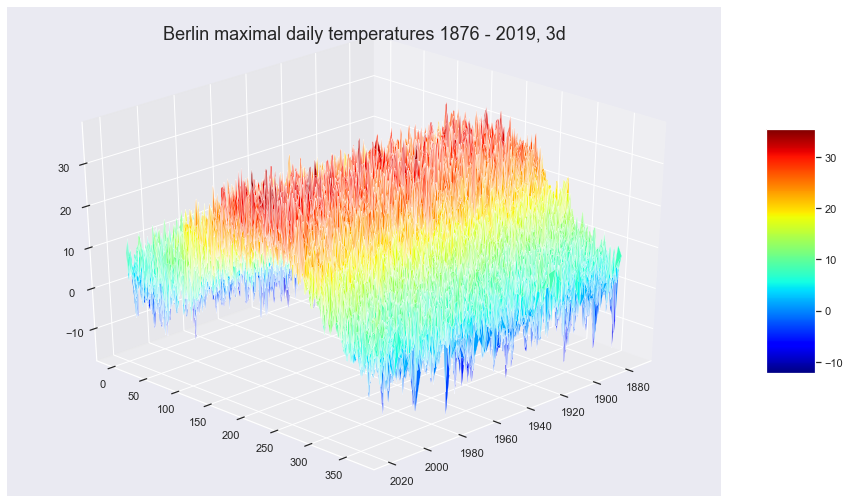

In [14]:
data_3d = read_csv_combined()
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_trisurf(data_3d['Measurement day'].dt.year,
				data_3d['Measurement day'].dt.dayofyear,
				data_3d['Max daily temp'],
				cmap=plt.cm.jet, linewidth=0.2)
# to Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.view_init(30, 45)
plt.title("Berlin maximal daily temperatures 1876 - 2019, 3d", size=18)
plt.show()

## Could we see on one 2d plot of all years that there is a trend of incrising temperatures?

Amazing! Its really a global view where we can observe the incrising numbers of hot days in the last 30 years, much more deep reds on the plot. In the same time there are less deep blues and blues generally.


So the temperatures in Berlin for sure are increasing!

--- Combined data read ---



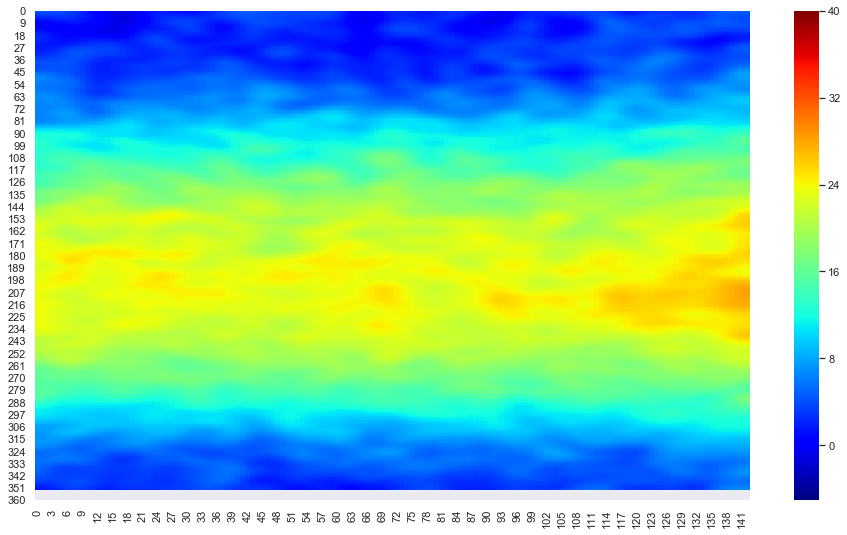

In [15]:
d = read_csv_combined()
d['year'] = pd.DatetimeIndex(d['Measurement day']).year
d['month'] = pd.DatetimeIndex(d['Measurement day']).month
d['day'] = pd.DatetimeIndex(d['Measurement day']).day
d_colorbar = pd.pivot_table(d, values='Max daily temp',
							index=d['Measurement day'].dt.dayofyear,
							columns=['year'])
heat_smooth = gaussian_filter(d_colorbar, sigma=3) #Missing data for 1945 dropped
ax=sns.heatmap(heat_smooth, cmap="jet", vmin=-5, vmax=40)
# plt.title("Berlin: Maximum daily temperatures (smoothed).", size=14)
# plt.xlabel("Year", size=11)
# plt.ylabel("Day of the year", size=11)
# plt.xticks(rotation=90, size=8, ticks=(np.arange(1876, 2021, 2)))
# plt.yticks(size=8, ticks=(np.arange(0, 360, 2)))
# plt.tick_params(labelright=True, size=8)  # here improve!!!!
plt.show()